In [3]:
import yt
import astropy.units as u
%matplotlib inline 
import matplotlib.pyplot as plt
import h5py
#yt.toggle_interactivity()

dataFile = '../data/snapshot_150.hdf5'

In [4]:
unit_base = {
    "length": (1.0, "pc"),
    "velocity": (100.0, "cm/s"),
    "mass": (1.0, "Msun")
}
ds = yt.load('../data/snapshot_150.hdf5', unit_base = unit_base)

yt : [INFO     ] 2024-02-21 19:02:56,402 ComovingIntegrationOn != 1 or (not found and OmegaLambda is 0.0), so we are turning off Cosmology.
yt : [INFO     ] 2024-02-21 19:02:56,425 Parameters: current_time              = 0.00012483821354781577
yt : [INFO     ] 2024-02-21 19:02:56,425 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-02-21 19:02:56,426 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-02-21 19:02:56,426 Parameters: domain_right_edge         = [8.16 8.16 8.16]
yt : [INFO     ] 2024-02-21 19:02:56,426 Parameters: cosmological_simulation   = 0


In [5]:
#ds.derived_field_list

In [6]:
ad = ds.all_data()
density = ad['PartType0', 'Density'].in_units('g/cm**3.')
vmag = ad['PartType0', 'particle_velocity_magnitude'].in_units('km/s')

partIDs = ad['PartType0', 'ParticleIDs']
print(f'{partIDs.min()} \t {partIDs.max()}')

print(f'Density = {density.max()}')
print(f'vmin = {vmag.min()} \t vmin = {vmag.max()}')

yt : [INFO     ] 2024-02-21 19:02:56,465 Allocating for 1.214e+07 particles
Loading particle index: 100%|█████████████████| 47/47 [00:00<00:00, 2991.88it/s]


1.0 dimensionless 	 1913298393.0 dimensionless
Density = 1.6995519756531778e-13 g/cm**3
vmin = 0.002685007729474139 km/s 	 vmin = 214.25672647988162 km/s


In [7]:

search_by_type = (ad["PartType5", "Velocities"]).in_units('km/s')
vmag_stars = (ad["PartType5", 'particle_velocity_magnitude']).in_units('km/s')
mstar = (ad["PartType5", 'Masses']).in_units('Msun')
print(f'Star Velocities = {search_by_type}')
print(f'Star Vmag min = {vmag_stars.min()} \t Star Vmag max = {vmag_stars.max()}')
print(f'Star Mass min = {mstar.min()} \t Star Mass max = {mstar.max()}')

Star Velocities = [[  1.05768518  -2.53281177   1.35109338]
 [ -1.75162146   2.99300464 -10.72804785]
 [  2.07684277  -1.87739331  -2.537448  ]
 ...
 [  4.07188403  -2.15853564  -0.18361487]
 [  0.11814554   1.2095647    2.32737842]
 [  2.73763794   2.95772046   1.73987463]] km/s
Star Vmag min = 0.3420367602403941 km/s 	 Star Vmag max = 28.237971824049733 km/s
Star Mass min = 0.0020000000949949026 Msun 	 Star Mass max = 8.331499099731445 Msun


In [8]:
sp = ds.sphere([0,0,0], (4, "pc"))

In [9]:
CoM = (sp.quantities.center_of_mass()* u.cm).to(u.pc)
print(CoM)

[4.07977682 4.0808035  4.07863818] pc


In [10]:
ds.all_data()

YTRegion (snapshot_150): , center=[1.25895645e+19 1.25895645e+19 1.25895645e+19] cm, left_edge=[0. 0. 0.] cm, right_edge=[2.51791291e+19 2.51791291e+19 2.51791291e+19] cm

yt : [INFO     ] 2024-02-21 19:02:59,227 xlim = 2.080000 6.080000
yt : [INFO     ] 2024-02-21 19:02:59,228 ylim = 2.080000 6.080000
yt : [INFO     ] 2024-02-21 19:02:59,228 xlim = 2.080000 6.080000
yt : [INFO     ] 2024-02-21 19:02:59,229 ylim = 2.080000 6.080000
yt : [INFO     ] 2024-02-21 19:02:59,249 Making a fixed resolution buffer of (('PartType0', 'density')) 800 by 800



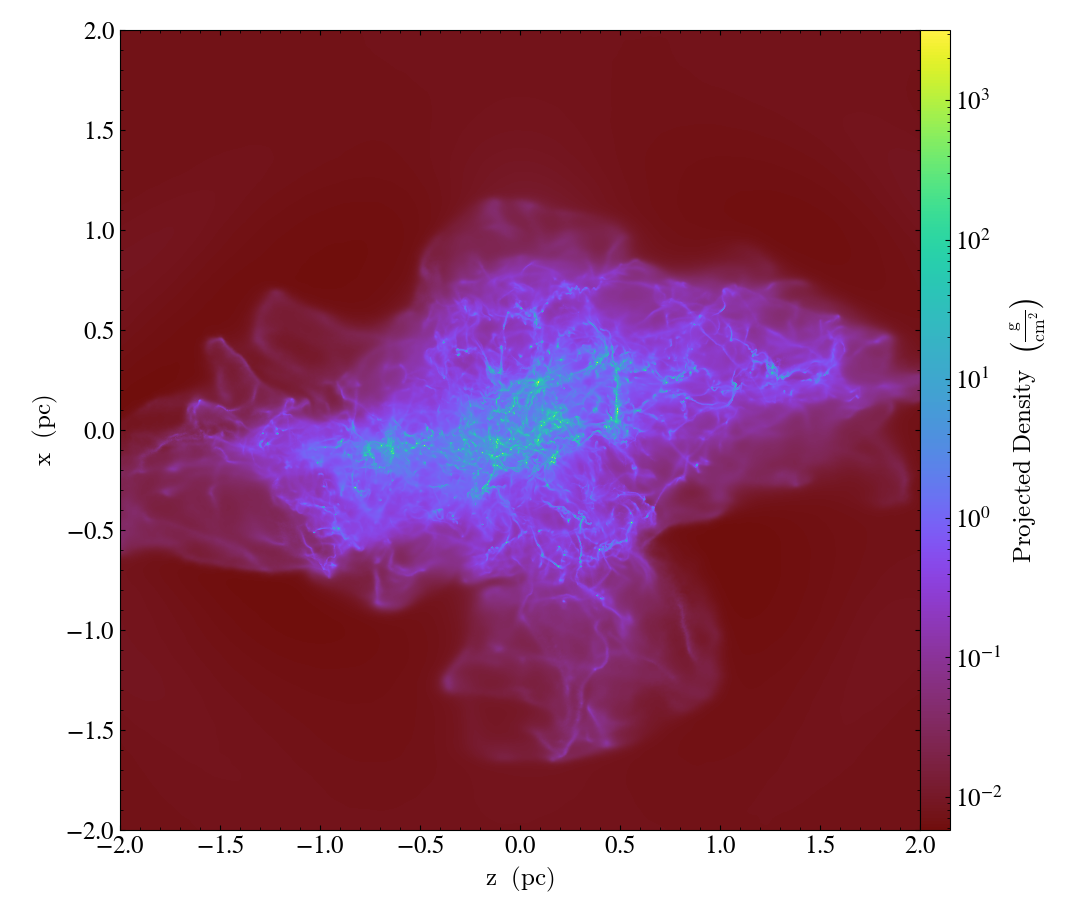

yt : [INFO     ] 2024-02-21 19:03:05,434 xlim = 2.080000 6.080000
yt : [INFO     ] 2024-02-21 19:03:05,437 ylim = 2.080000 6.080000
yt : [INFO     ] 2024-02-21 19:03:05,439 xlim = 2.080000 6.080000
yt : [INFO     ] 2024-02-21 19:03:05,439 ylim = 2.080000 6.080000
yt : [INFO     ] 2024-02-21 19:03:05,439 Making a fixed resolution buffer of (('PartType0', 'density')) 800 by 800
yt : [INFO     ] 2024-02-21 19:03:11,131 Making a fixed resolution buffer of (('PartType0', 'density')) 800 by 800



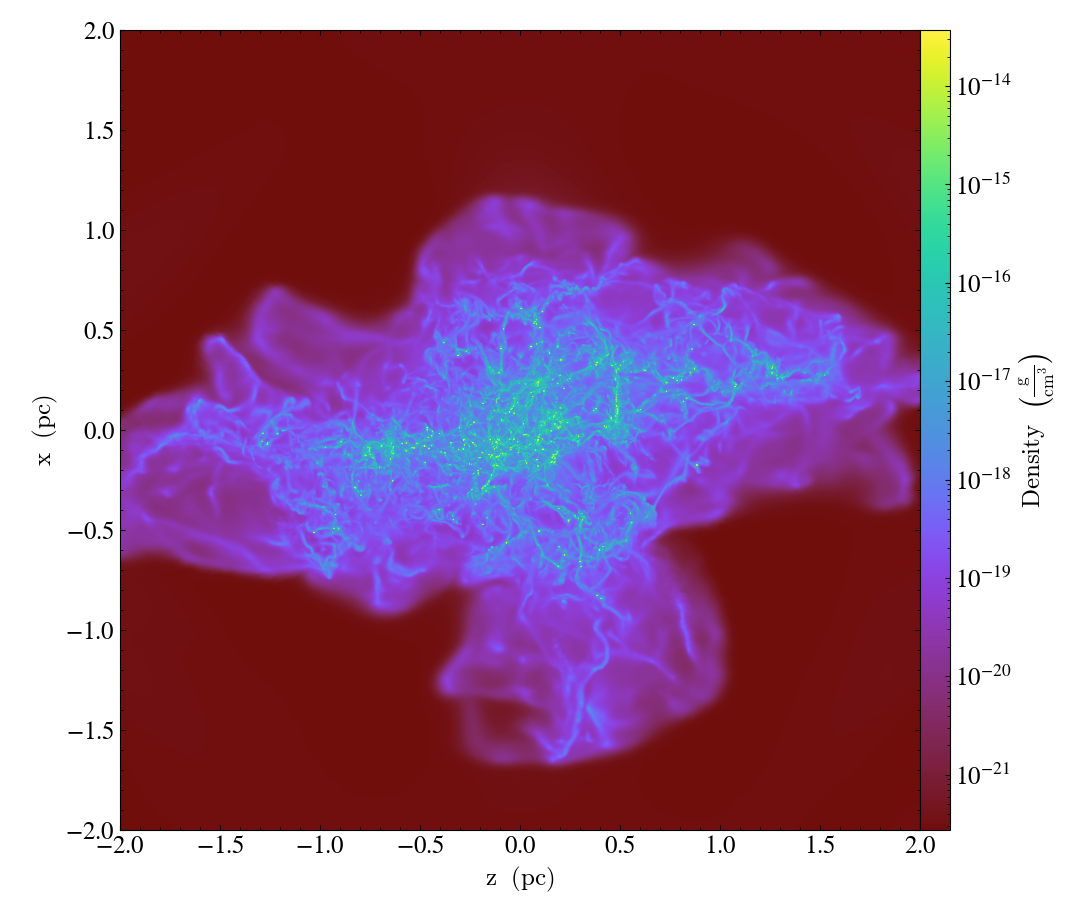

yt : [INFO     ] 2024-02-21 19:03:16,867 xlim = 2.080000 6.080000
yt : [INFO     ] 2024-02-21 19:03:16,867 ylim = 2.080000 6.080000
yt : [INFO     ] 2024-02-21 19:03:16,868 xlim = 2.080000 6.080000
yt : [INFO     ] 2024-02-21 19:03:16,868 ylim = 2.080000 6.080000
yt : [INFO     ] 2024-02-21 19:03:16,869 Making a fixed resolution buffer of (('PartType0', 'particle_velocity_magnitude')) 800 by 800
yt : [INFO     ] 2024-02-21 19:03:23,003 Making a fixed resolution buffer of (('PartType0', 'density')) 800 by 800



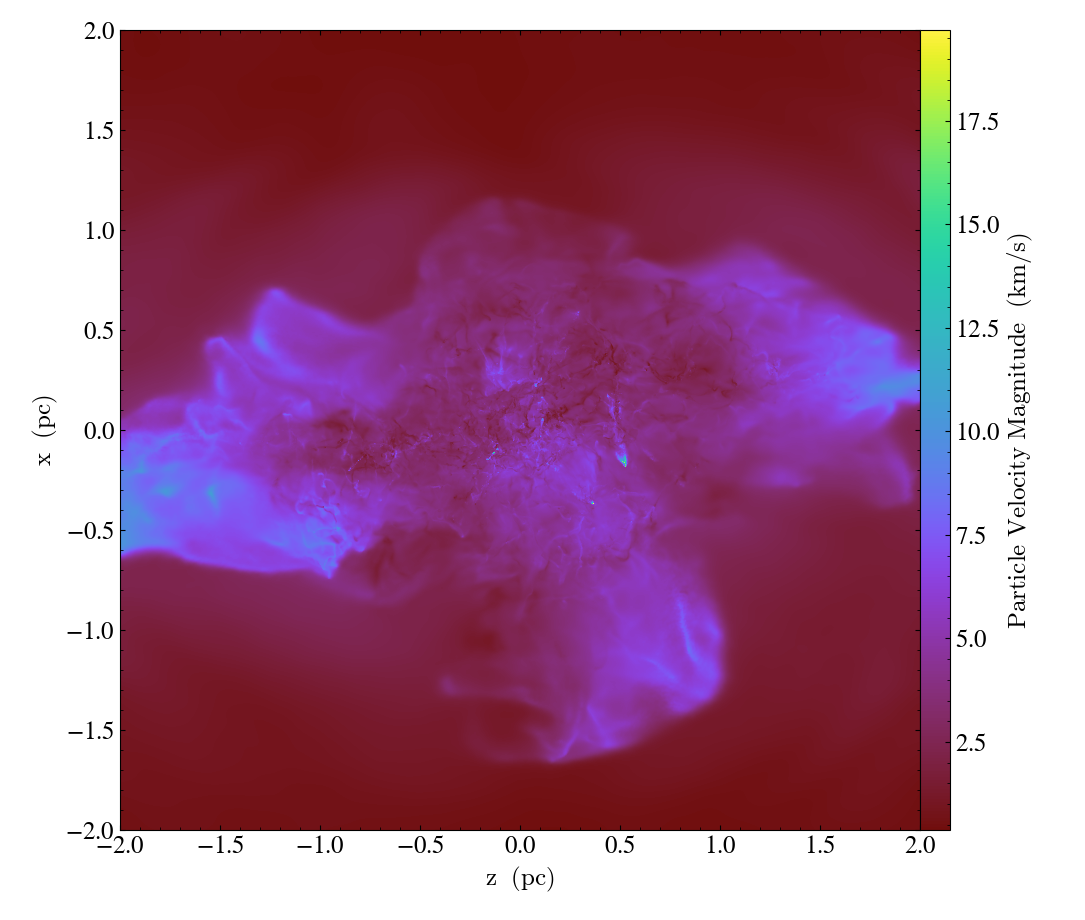

In [11]:
pwidth = (4.0,'pc')
projUnit = ["g/cm**2", "g/cm**3", "km/s"]
weightField = [None, ("PartType0", "density"), ("PartType0", "density")]
#'Msun/pc**2'
proFields = [("PartType0", "density"), ("PartType0", "density"), ("PartType0", 'particle_velocity_magnitude')]

for i, field in enumerate(proFields):
    p = yt.ProjectionPlot(ds, "y", field, width = pwidth, weight_field = weightField[i])
    p.set_axes_unit('pc')
    p.set_unit(field, projUnit[i])
    #p.annotate_particles(pwidth)
    p.show()

In [12]:
grad_fields = ds.add_gradient_fields(("gas", "temperature"))

In [13]:
grad_fields

[('gas', 'temperature_gradient_x'),
 ('gas', 'temperature_gradient_y'),
 ('gas', 'temperature_gradient_z'),
 ('gas', 'temperature_gradient_magnitude')]

In [14]:
ad["PartType0", "Density"]

unyt_array([16065.83203125, 25908.5       , 30100.171875  , ...,
            46262.8046875 , 44841.18359375, 40575.89453125], 'code_mass/code_length**3')

In [15]:
ds.mass_unit

unyt_quantity(1., 'Msun')

In [16]:
ds.length_unit

unyt_quantity(0.001, 'kpc')

In [17]:
source = ds.sphere("c", (10, "kpc"))
profile = source.profile(
    [("gas", "density")],  # the bin field
    [
        ("gas", "temperature"),  # profile field
        ("gas", "radial_velocity"),
    ],  # profile field
    weight_field=("gas", "mass"),
)

In [18]:
print(profile.x)  # bin field
print(profile.weight)  # weight field
print(profile["gas", "temperature"])  # profile field
print(profile["gas", "radial_velocity"])  # profile field
print(profile.used)

[2.71752940e-23 3.87750129e-23 5.53260481e-23 7.89418591e-23
 1.12638031e-22 1.60717345e-22 2.29319216e-22 3.27203656e-22
 4.66869871e-22 6.66152324e-22 9.50498086e-22 1.35621626e-21
 1.93511441e-21 2.76111405e-21 3.93968995e-21 5.62133859e-21
 8.02079551e-21 1.14444557e-20 1.63294984e-20 2.32997115e-20
 3.32451459e-20 4.74357686e-20 6.76836299e-20 9.65742494e-20
 1.37796771e-19 1.96615042e-19 2.80539772e-19 4.00287603e-19
 5.71149551e-19 8.14943573e-19 1.16280058e-18 1.65913963e-18
 2.36734001e-18 3.37783427e-18 4.81965595e-18 6.87691627e-18
 9.81231397e-18 1.40006802e-17 1.99768420e-17 2.85039164e-17
 4.06707550e-17 5.80309839e-17 8.28013912e-17 1.18144996e-16
 1.68574947e-16 2.40530820e-16 3.43200911e-16 4.89695521e-16
 6.98721056e-16 9.96968716e-16 1.42252278e-15 2.02972373e-15
 2.89610717e-15 4.13230462e-15 5.89617043e-15 8.41293877e-15
 1.20039846e-14 1.71278609e-14 2.44388534e-14 3.48705283e-14
 4.97549422e-14 7.09927380e-14 1.01295844e-13 1.44533768e-13] g/cm**3
[1.82934268e+32


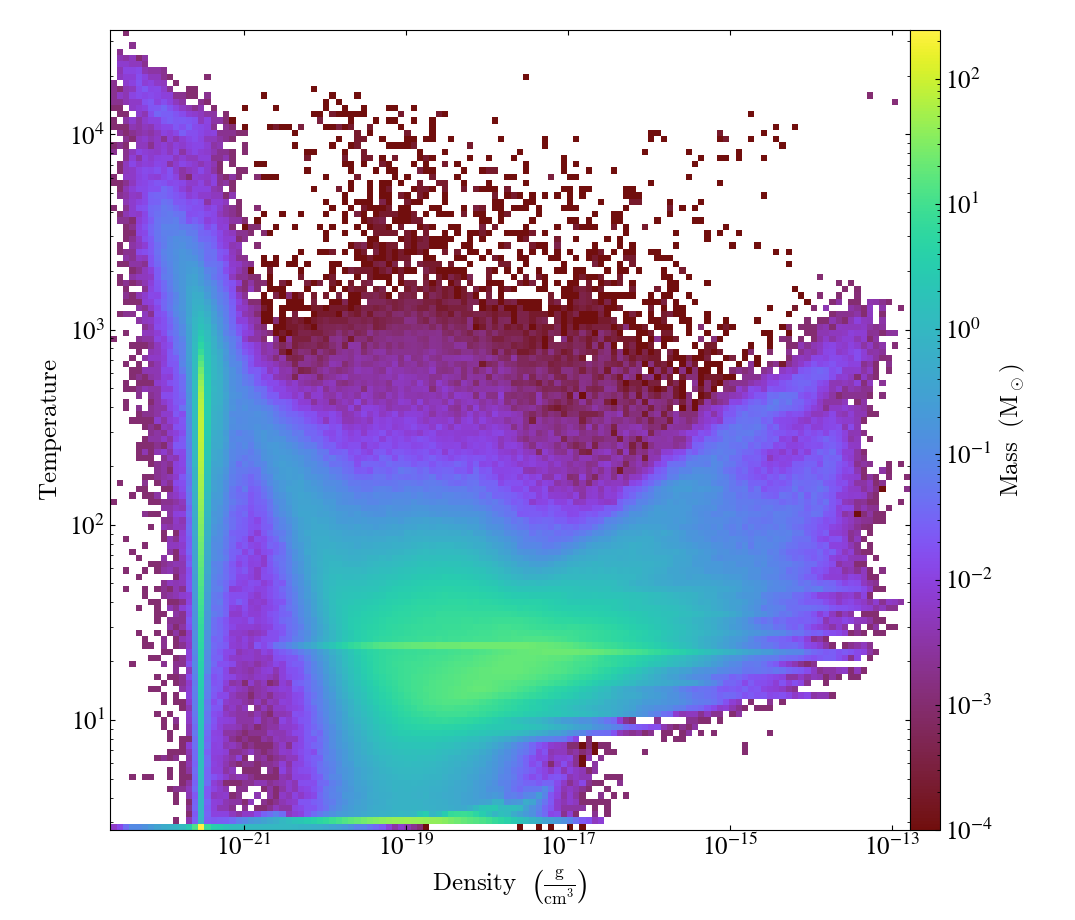

In [19]:
my_sphere = ds.sphere("c", (80.0, "kpc"))

# Create a PhasePlot object.
# Setting weight to None will calculate a sum.
# Setting weight to a field will calculate an average
# weighted by that field.
plot = yt.PhasePlot(
    my_sphere,
    ("gas", "density"),
    ("gas", "temperature"),
    ("gas", "mass"),
    weight_field=None,
)

# Set the units of mass to be in solar masses (not the default in cgs)
plot.set_unit(("gas", "mass"), "Msun")



yt : [INFO     ] 2024-02-21 19:03:35,717 xlim = 3.830000 4.330000
yt : [INFO     ] 2024-02-21 19:03:35,717 ylim = 3.830000 4.330000
yt : [INFO     ] 2024-02-21 19:03:35,718 xlim = 3.830000 4.330000
yt : [INFO     ] 2024-02-21 19:03:35,718 ylim = 3.830000 4.330000
yt : [INFO     ] 2024-02-21 19:03:35,719 Splatting (('all', 'particle_mass')) onto a 800 by 800 mesh using method 'ngp'



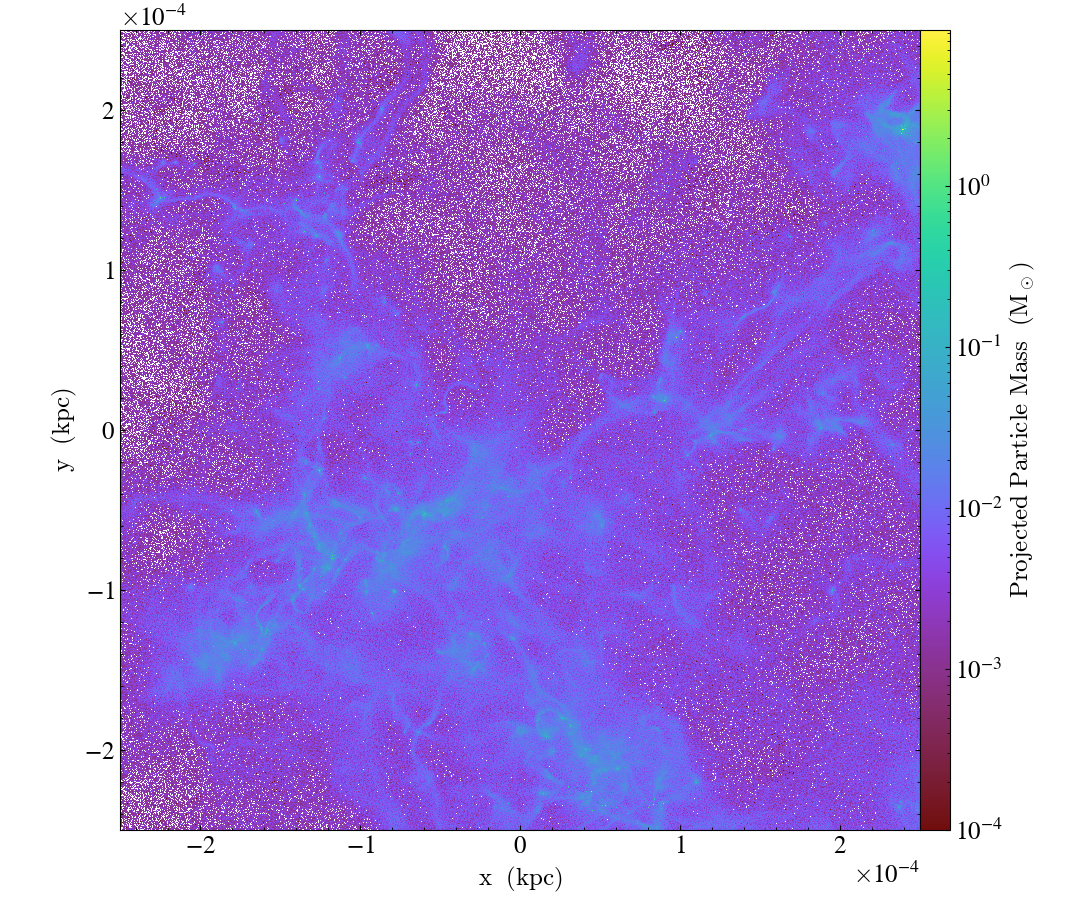

In [20]:
p = yt.ParticlePlot(
    ds,
    ("all", "particle_position_x"),
    ("all", "particle_position_y"),
    ("all", "particle_mass"),
    width=(0.5, 0.5),
)

# pick some appropriate units
p.set_axes_unit("kpc")
p.set_unit(("all", "particle_mass"), "Msun")


In [64]:
ts = yt.DatasetSeries(['data/snapshot_150.hdf5'])